In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.scipy.integrate import trapezoid

Gauss Smoothness: 1326.8699951171875
CLEAR Smoothness: 35859356.0
Smooth CLEAR Smoothness: 129023.03125


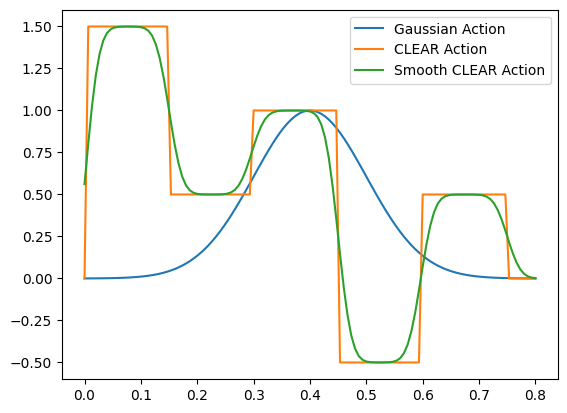

In [19]:
from typing import Optional

t0 = 0.
t1 = 0.8
num_actions = 121
ts = jnp.linspace(t0, t1, num_actions)

dx = ts[1] - ts[0]

def calculate_smoothness(action, dx: Optional[float] = 0.01):
    """Physics Specific Function"""
    first_deriv = jnp.diff(action) / dx
    second_deriv = jnp.diff(first_deriv) / dx
    integral_val = trapezoid(y=second_deriv**2, x=ts[2:])
    return integral_val

def clear_segment(ts, t0, t1, amp):
    return amp * jnp.heaviside(t1 - ts, 1.) * jnp.heaviside(ts - t0, 0.)

# Making CLEAR Action
delta_amp = 0.5
clear_segment_dur = 0.15
meas_duration = 0.45
clear_action = clear_segment(ts, 0., clear_segment_dur, 1. + delta_amp)
clear_action += clear_segment(ts, clear_segment_dur, 2. * clear_segment_dur, 1. - delta_amp)
clear_action += clear_segment(ts, 2. * clear_segment_dur, meas_duration, 1.)
clear_action += clear_segment(ts, meas_duration, meas_duration + clear_segment_dur, -delta_amp)
clear_action += clear_segment(ts, meas_duration + clear_segment_dur, meas_duration + 2 * clear_segment_dur, delta_amp)

window_len = 15
ts_window = jnp.linspace(-0.5 * (window_len - 1), 0.5 * (window_len - 1), window_len)
std = 2.
gauss_kernel = 1/(jnp.sqrt(2. * jnp.pi) * std) * jnp.exp(-(ts_window)**2 / (2 * std**2))

smooth_clear_action = jnp.convolve(clear_action, gauss_kernel, mode='same')
smooth_clear_action = jnp.convolve(smooth_clear_action, gauss_kernel, mode='same')

gauss_action = jnp.exp(-(ts - 0.5 * t1)**2 / (2 * 0.1 ** 2))

gauss_smoothness = calculate_smoothness(gauss_action, dx)
print(f"Gauss Smoothness: {gauss_smoothness}")
clear_smoothness = calculate_smoothness(clear_action, dx)
print(f"CLEAR Smoothness: {clear_smoothness}")
smooth_clear_smoothness = calculate_smoothness(smooth_clear_action, dx)
print(f"Smooth CLEAR Smoothness: {smooth_clear_smoothness}")

plt.plot(ts, gauss_action, label='Gaussian Action')
plt.plot(ts, clear_action, label='CLEAR Action')
plt.plot(ts, smooth_clear_action, label='Smooth CLEAR Action')
plt.legend()
plt.show()